# Plots the results of monitoring during the entire measurement

In [22]:
from midas_sub import *
from matplot_tz_preamble import *
import datetime 
%matplotlib notebook
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from pandas import to_datetime, DataFrame, DatetimeIndex

In [27]:
df_timing = pd.read_csv('timing.csv')
fname = 'online_data09-08-19.csv'
df_stb = pd.read_csv(fname ,names=['time', 
                                                      "AIN72", "AIN74", "AIN76",
                                                      "AIN79", "AIN81", "AIN83",
                                                     "AIN96", "AIN98", "AIN100", 
                                                      "AIN107", "AIN109", "AIN110", 
                                                     "AIN108", "AIN111", "AIN113",
                                                      'nan'])

df_stb['datetime'] = pd.to_datetime(df_stb.time,unit='s').dt.tz_localize('UTC').dt.tz_convert('America/Vancouver')


In [87]:
df_timing['start_dt'] = (DatetimeIndex(to_datetime((df_timing.start) * 1e9)).tz_localize('UTC')).tz_convert('America/Vancouver')
df_timing['end_dt'] = (DatetimeIndex(to_datetime((df_timing.end) * 1e9)).tz_localize('UTC')).tz_convert('America/Vancouver')

<IPython.core.display.Javascript object>


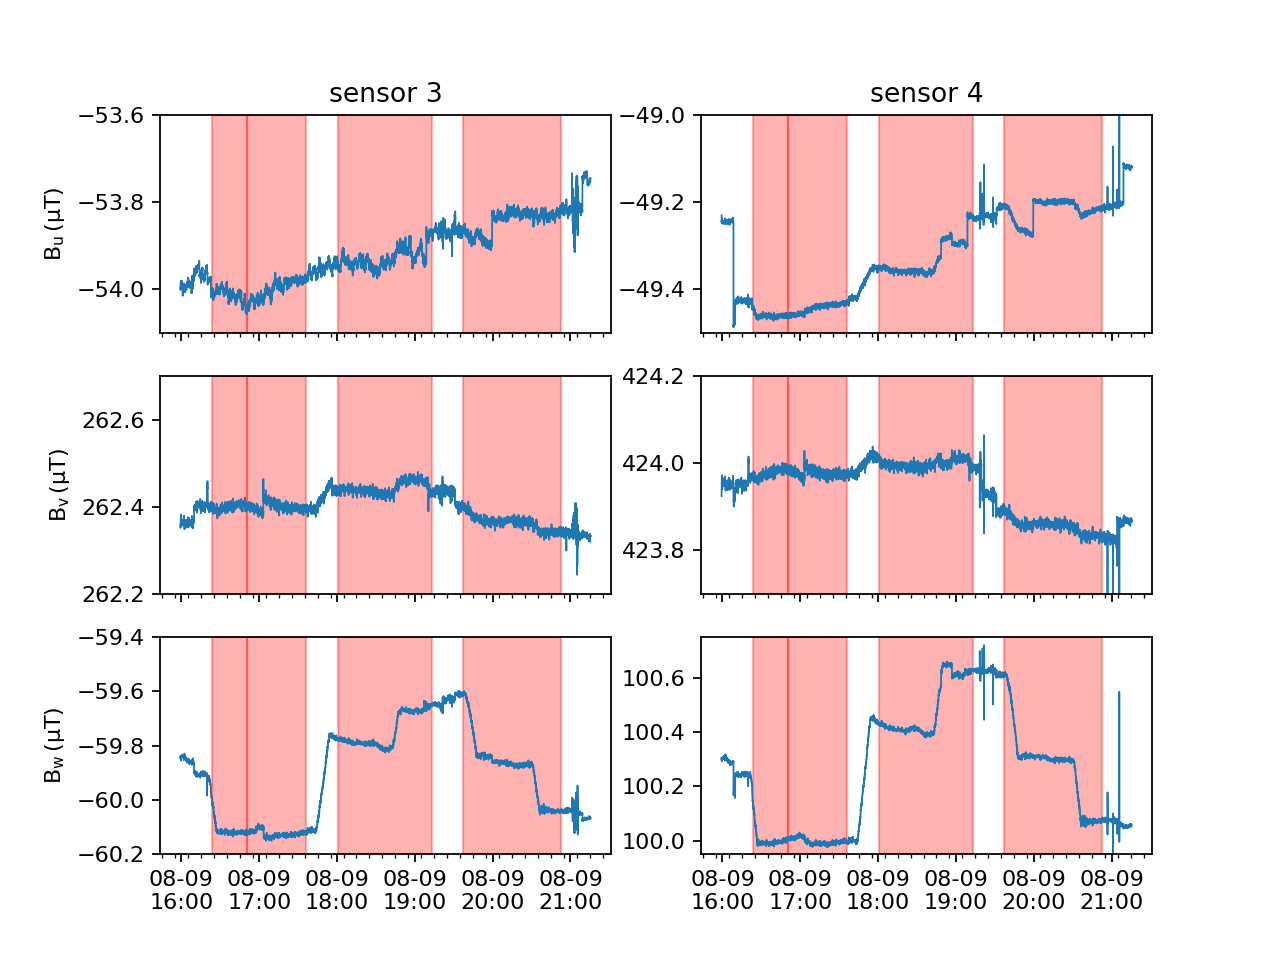

In [139]:
fig0, ax0 = plt.subplots(3,2, figsize=(8,6), sharex=True)

xfmt = mdates.DateFormatter('%m-%d\n%H:%M', tz=tz_PDT)

for i in range(3):
    
    ax0[i,0].xaxis.set_major_formatter(xfmt)
    ax0[i,0].xaxis.set_major_locator(mdates.HourLocator(interval=1))
    ax0[i,0].xaxis.set_minor_locator(mdates.MinuteLocator(interval=10))
    ax0[i,1].xaxis.set_major_formatter(xfmt)
    ax0[i,1].xaxis.set_major_locator(mdates.HourLocator(interval=1))
    ax0[i,1].xaxis.set_minor_locator(mdates.MinuteLocator(interval=10))
    
ax0[0,0].plot(df_stb.datetime, -df_stb.AIN98*100)
ax0[1,0].plot(df_stb.datetime, -df_stb.AIN96*100)
ax0[2,0].plot(df_stb.datetime, df_stb.AIN100*100)

ax0[0,1].plot(df_stb.datetime, -df_stb["AIN108"]*100)
ax0[1,1].plot(df_stb.datetime, df_stb["AIN111"]*100)
ax0[2,1].plot(df_stb.datetime, df_stb["AIN113"]*100)

for i in range(3):
    for j in range(2):
        ax0[i,j].axvspan(df_timing.start_dt[0], df_timing.end_dt[0], color='r', alpha=0.3)
        ax0[i,j].axvspan(df_timing.start_dt[1], df_timing.end_dt[1], color='r', alpha=0.3)
        ax0[i,j].axvspan(df_timing.start_dt[2], df_timing.end_dt[2], color='r', alpha=0.3)
        ax0[i,j].axvspan(df_timing.start_dt[3], df_timing.end_dt[3], color='r', alpha=0.3)

ax0[0,0].set_ylabel('$\mathsf{B_u\,(\mu T)}$')
ax0[1,0].set_ylabel('$\mathsf{B_v\,(\mu T)}$')
ax0[2,0].set_ylabel('$\mathsf{B_w\,(\mu T)}$')
        


ax0[0,0].set_ylim(-54.1,-54.1+.5)
ax0[0,1].set_ylim(-49.5,-49.5+0.5)
ax0[1,0].set_ylim(262.2, 262.7)
ax0[1,1].set_ylim(423.7, 424.2)
ax0[2,0].set_ylim(-60.2, -60.2+0.8)
ax0[2,1].set_ylim(99.95, 99.95+.8)

ax0[0,0].set_title('sensor 3')
ax0[0,1].set_title('sensor 4')
# fig0.tight_layout()
fig0.savefig('monitoring')

In [77]:
ax0[0,0].axhspan

<bound method AxesSubplot.axhspan of <matplotlib.axes._subplots.AxesSubplot object at 0x13e581190>>

In [ ]:
ax0[0,0].axhspan

In [ ]:
ax0[0,0].axhspan

<IPython.core.display.Javascript object>


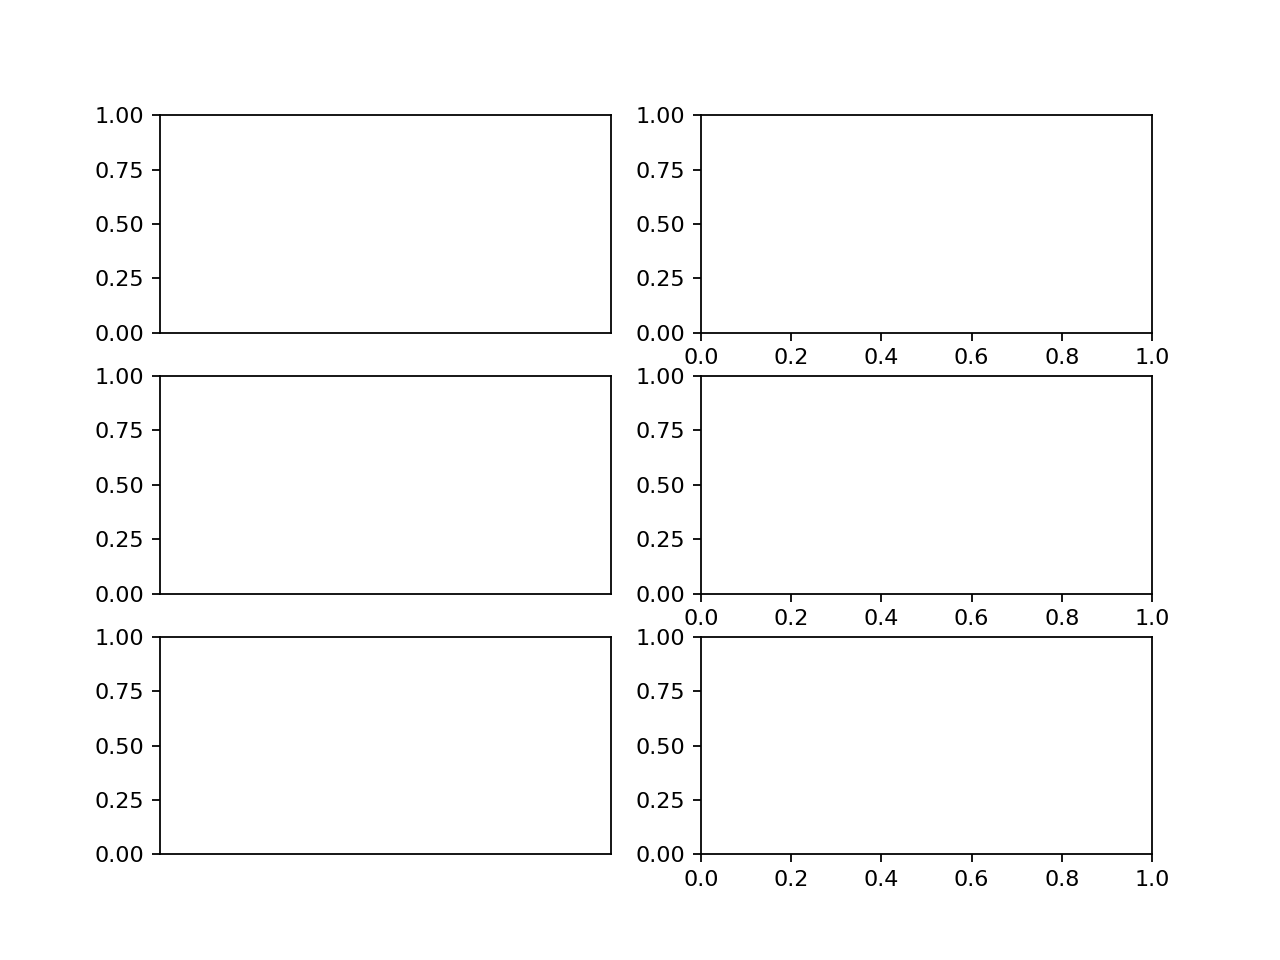

In [28]:
fig, ax = plt.subplots(3,2, figsize=(8,6))`a

xfmt = mdates.DateFormatter('%m-%d\n%H:%M', tz=tz_PDT)

for i in range(3):
    
    ax[i,0].xaxis.set_major_formatter(xfmt)
    ax[i,0].xaxis.set_major_locator(mdates.MinuteLocator(interval=20))
    ax[i,0].xaxis.set_minor_locator(mdates.MinuteLocator(interval=1))